<a href="https://colab.research.google.com/github/scardenol/proc_est2/blob/main/esto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Se corre una vez al abrir una nueva sesión
# !pip install yfinance
# !pip install fitter

In [2]:
import numpy as np
import matplotlib.pyplot as plt #gráficas
import matplotlib as mpl
import seaborn as sns #gráficas
plt.style.use('ggplot') #estilo de graficas

# Pronóstico 1

## 2.


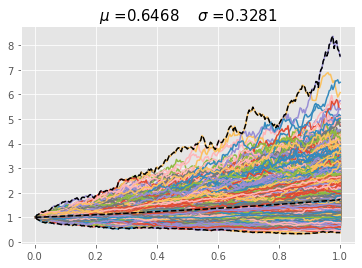

In [3]:
# EDE Lineal Homogénea dXt = F(t)Xt dt + G(t)Xt dBt, X(0)
# En este caso         dXt = mu*Xt dt + sigma*Xt dBt
# Con solución X(t) = X(t-1)*exp[(mu-0.5*sigma^2)dt + sigma*dBt]
import random as rnd

l = 10000 # número de simulaciones
p = 252 # número de observaciones

X = np.zeros((l,p))
dt = 1/p

plt.figure()
for sim in range(l):
  X[sim,0] = 1
  mu = rnd.random()
  sigma = rnd.random()*0.4
  for t in range(1, p):
    dBt = np.sqrt(dt)*np.random.normal(0,1)
    X[sim, t] = X[sim, t-1]*np.exp((mu-0.5*sigma**2)*dt + sigma*dBt)
  plt.plot(np.linspace(dt, 1, p), X[sim])

X_max = np.amax(X, axis=0)
X_min = np.amin(X, axis=0)
X_mean = np.mean(X, axis=0)

# Análisis longitudinal
plt.plot(np.linspace(dt, 1, p), X_max, '--', color='black')
plt.plot(np.linspace(dt, 1, p), X_min, '--', color='black')
plt.plot(np.linspace(dt, 1, p), X_mean, '--', color='black')

plt.title('$\mu$ =' + str(round(mu, 4)) + '    $\sigma$ =' + str(round(sigma,4)), fontsize = 15);

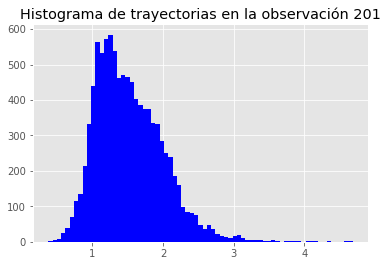

In [4]:
# Análisis transversal
X_tra = X[:, 200]

_ = plt.hist(X_tra, bins='auto', color='blue')
plt.title('Histograma de trayectorias en la observación 201');

,sumsquare_error,aic,bic,kl_div
gamma,0.263209,749.306851,-105423.843265,inf
lognorm,0.269533,691.067184,-105186.421901,inf
beta,0.414402,849.338817,-100875.756053,inf
norm,0.921724,1161.398479,-92900.075128,inf


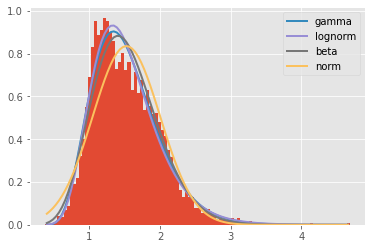

In [8]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(X_tra,
           distributions=['lognorm',
                          'gamma',
                          "beta",
                          "norm"])
f.fit()
f.summary()

In [9]:
params = f.fitted_param["lognorm"]
params

# Buscar por qué tiene 3

(0.297345203824935, -0.04702811367311298, 1.504044993990819)

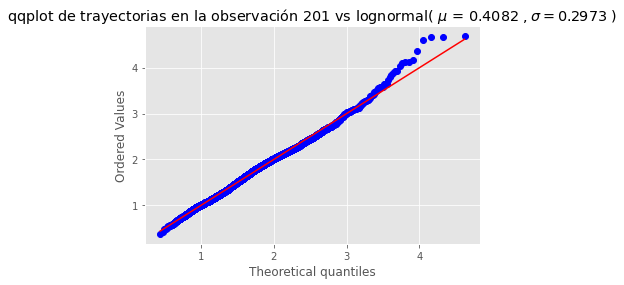

In [10]:
import pylab 
import scipy.stats as stats

sigma_hat = str(round(params[0],4))
mu_hat = str(round(np.log(params[2]), 4))

fig = plt.figure()
stats.probplot(X_tra, dist=stats.lognorm, sparams=params, plot=pylab);
plt.title('qqplot de trayectorias en la observación 201 vs lognormal( $\mu$ = ' + mu_hat + ' $,\sigma = $' + sigma_hat + ' )');

In [11]:
# Condiciones a nivel de distribución

In [54]:
# Autocorrelación parcial PACF
import pandas as pd
from statsmodels.tsa.stattools import pacf
df = pd.DataFrame(X)
df_pacf = pd.DataFrame([pacf(df.iloc[i,:].to_numpy()) for i in range(10000)])


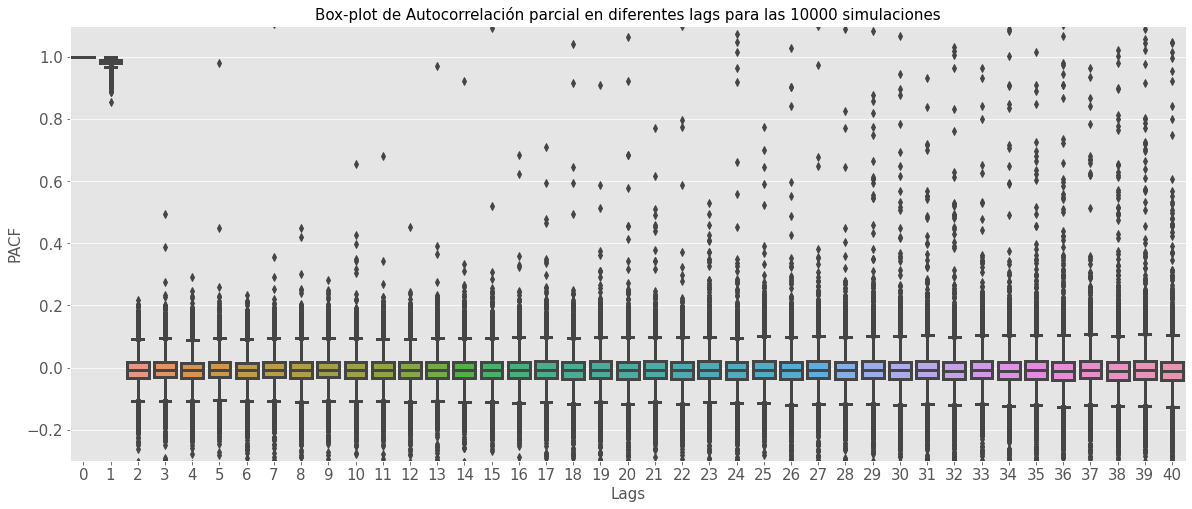

In [57]:
# Visualizar

fig, ax = plt.subplots(figsize = (20, 8));
sns.boxplot(data = df_pacf, linewidth = 3);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('Lags', fontsize = 15);
plt.ylabel('PACF', fontsize = 15);
plt.title('Box-plot de Autocorrelación parcial en diferentes lags para las ' + str(l) + ' simulaciones'
, fontsize = 15);


plt.ylim([-0.3, 1.1]);

In [58]:
# Dimensión fractal (indicador fractal?)

In [59]:
# Varianza de largo plazo (pensarla)

## 3.

In [60]:
# yfinance package de https://pypi.org/project/yfinance/

import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055783,0.063987,0.055783,0.061252,1031788800,0.0,0.0
1986-03-14,0.061252,0.064533,0.061252,0.063439,308160000,0.0,0.0
1986-03-17,0.063439,0.065080,0.063439,0.064533,133171200,0.0,0.0
1986-03-18,0.064533,0.065080,0.062345,0.062892,67766400,0.0,0.0
1986-03-19,0.062892,0.063439,0.061252,0.061799,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-08,300.440002,301.119995,296.279999,296.970001,24347400,0.0,0.0
2022-04-11,291.790009,292.609985,285.000000,285.260010,34569300,0.0,0.0
2022-04-12,289.239990,290.739990,280.489990,282.059998,30966700,0.0,0.0
